In [49]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir("output/fhir")

In [4]:
fileList = os.listdir()

In [15]:
patientDict = {}
for file in fileList:
#     print(file)
    try:
        f = open(file)
        fJSON = json.load(f)
#         print(fJSON)
        patientName = fJSON['entry'][0]['resource']['name'][0]['given'][0] + " " + fJSON['entry'][0]['resource']['name'][0]['family']
#         print(patientName)
        patientDict[patientName] = fJSON['entry']
        f.close()
    except:
        continue

In [26]:
# split into patients with and without CHF
chf = {}
nonchf = {}
for key in patientDict.keys():
    patient = patientDict[key]
    for entry in patient:
        if entry['resource']['resourceType'] == "Condition" and entry['resource']['code']['text'] == "Chronic congestive heart failure (disorder)":
            chf[key] = patient
#             patientDict.pop(key)
            continue
        nonchf[key] = patient
#         patientDict.pop(key)
patientDict.clear()

In [61]:
ureaNitrogenCHF = {}
ureaNitrogenNonCHF = {}
for key in chf.keys():
    readings = []
    patient = chf[key]
    for entry in patient:
        if entry['resource']['resourceType'] == 'Observation' and entry['resource']['code']['text'] == 'Urea Nitrogen':
#             print("here")
            readings.append(entry['resource']['valueQuantity']['value'])
        if len(readings) > 0:
            ureaNitrogenCHF[key] = readings
for key in nonchf.keys():
    readings = []
    patient = nonchf[key]
    for entry in patient:
        if entry['resource']['resourceType'] == 'Observation' and entry['resource']['code']['text'] == 'Urea Nitrogen':
#             print(entry['resource']['valueQuantity']['value'])
            readings.append(entry['resource']['valueQuantity']['value'])
        if len(readings) > 0:
            ureaNitrogenNonCHF[key] = readings

In [57]:
nonCHFMean = []
CHFMean = []
for key in ureaNitrogenNonCHF.keys():
    nonCHFMean.append(np.mean(ureaNitrogenNonCHF[key]))

for key in ureaNitrogenCHF.keys():
    CHFMean.append(np.mean(ureaNitrogenCHF[key]))

(array([ 1.,  3.,  6., 19., 10.,  7.,  2.,  3.,  3.,  3.]),
 array([10.42 , 11.221, 12.022, 12.823, 13.624, 14.425, 15.226, 16.027,
        16.828, 17.629, 18.43 ]),
 <a list of 10 Patch objects>)

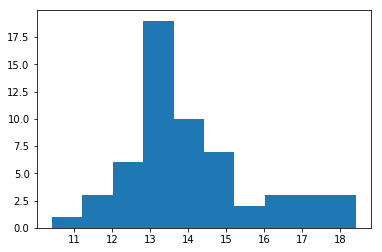

In [64]:
plt.hist(CHFMean, bins = 10)

(array([ 2.,  2.,  1.,  2., 10.,  3., 27., 23., 44., 76., 77., 58., 45.,
        17., 14., 11.,  8.,  4.,  3.,  4.]),
 array([ 8.19  ,  8.7155,  9.241 ,  9.7665, 10.292 , 10.8175, 11.343 ,
        11.8685, 12.394 , 12.9195, 13.445 , 13.9705, 14.496 , 15.0215,
        15.547 , 16.0725, 16.598 , 17.1235, 17.649 , 18.1745, 18.7   ]),
 <a list of 20 Patch objects>)

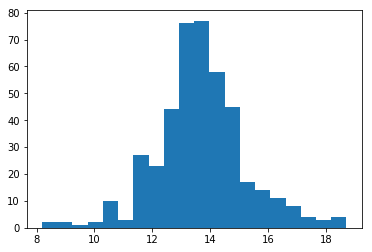

In [65]:
plt.hist(nonCHFMean, bins = 20)

In [60]:
print("Mean Urea Nitrogen for patients with CHF: ", np.mean(CHFMean))
print("Mean Urea Nitrogen for patients without CHF: ", np.mean(nonCHFMean))

Mean Urea Nitrogen for patients with CHF:  14.04197723981607
Mean Urea Nitrogen for patients without CHF:  13.686823573205077


In [66]:
len(CHFMean)

57

In [67]:
len(nonCHFMean)

431